## Homework - week 1

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".
Download the data for January and February 2023.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [3]:
# Q1. Downloading the data
# Read the data for January. How many columns are there?

df_jan = pd.read_parquet('../data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('../data/yellow_tripdata_2023-02.parquet')

print("Number of columns (january DF): ", len(df_jan.columns))

Number of columns (january DF):  19


In [4]:
# Q2. Computing duration
# Now let's compute the duration variable. It should contain the duration of a ride in minutes. 
# What's the standard deviation of the trips duration in January?
def add_duration(df):
    df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime)
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

add_duration(df_jan)
add_duration(df_feb)

In [5]:
print('Standard deviation (january DF):', round(df_jan['duration'].std(), 2))

Standard deviation (january DF): 42.59


In [6]:
# Q3. Dropping outliers
# Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep
# only the records where the duration was between 1 and 60 minutes (inclusive). What fraction of the records left after 
# you dropped the outliers?
def filter_dataframe(df):
    filtered = df[(df_jan['duration'] > 1) & (df['duration'] < 60)]
    return filtered

df_jan_filtered = filter_dataframe(df_jan)
df_feb_filtered = filter_dataframe(df_feb)

df_jan_len = len(df_jan.index)
df_jan_filtered_len = len(df_jan_filtered.index)

fraction_left = (df_jan_filtered_len / df_jan_len) * 100
print(f'Fraction of the record left (january DF): {round(fraction_left, 0)}%')

/tmp/nix-shell.Qb22vg/ipykernel_57327/3416407160.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = df[(df_jan['duration'] > 1) & (df['duration'] < 60)]


Fraction of the record left (january DF): 98.0%


In [9]:
# 04. One hot encoding
# Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.
# - Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
# - Fit a dictionary vectorizer
# - Get a feature matrix from it
# What's the dimensionality of this matrix (number of columns)?
def x_data(df):
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    return df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train_hw = dv.fit_transform(x_data(df_jan_filtered))
X_val_hw = dv.transform(x_data(df_feb_filtered))

print('Dimensionality of the train matrix (january DF): ', X_train_hw.ndim)

/tmp/nix-shell.Qb22vg/ipykernel_57327/1861762296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)
/tmp/nix-shell.Qb22vg/ipykernel_57327/1861762296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


Dimensionality of the train matrix (january DF):  2


In [10]:
# 05. Training model
# Now let's use the feature matrix from the previous step to train a model.
# - Train a plain linear regression model with default parameters
# - Calculate the RMSE of the model on the training data
# What's the RMSE on train?
def train_and_predict(X, y):
    lr = LinearRegression()
    lr.fit(X, y)
    return lr.predict(X)

    
y_train_hw = df_jan_filtered['duration'].values
y_train_hw_predict = train_and_predict(X_train_hw, y_train_hw)

y_val_hw = df_feb_filtered['duration'].values
y_val_hw_predict =  train_and_predict(X_val_hw, y_val_hw)

In [11]:
rmse_train = mean_squared_error(y_train_hw, y_train_hw_predict, squared=False)
rmse_val = mean_squared_error(y_val_hw, y_val_hw_predict, squared=False)
print(f'RMSE train value: {round(rmse_train, 2)}, RMSE val value: {round(rmse_val, 2)}')

RMSE train value: 7.65, RMSE val value: 8.06


/nix/store/kvpg58s66ywi60yw53h79zvfhlcbpnc0-python3.11-scikit-learn-1.4.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/nix/store/kvpg58s66ywi60yw53h79zvfhlcbpnc0-python3.11-scikit-learn-1.4.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/tmp/nix-shell.Qb22vg/ipykernel_57327/1739932881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val_hw_predict, label='prediction')
/tmp/nix-shell.Qb22vg/ipykernel_57327/1739932881.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_hw, label='actual')


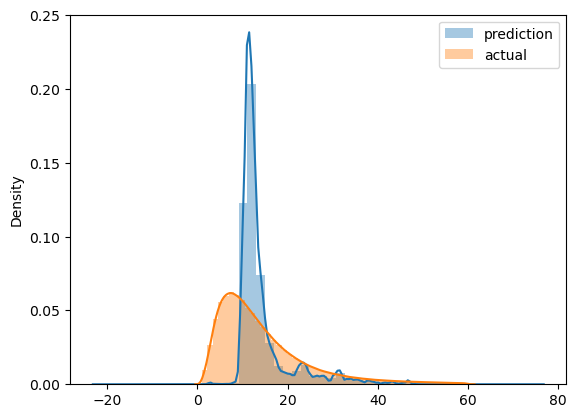

In [12]:
sns.distplot(y_val_hw_predict, label='prediction')
sns.distplot(y_train_hw, label='actual')
plt.legend()